In [1]:
from URSGeneClassifier import *
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import operator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import copy
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Random State
rand = 42

# Load in all data from saved file
X_train, X_test, y_train, y_test, X_full, y_full = load_and_format_training_data('./training/bipolar_full_training.pkl')

# Empty dict, will be populated with classifier names and scores
scores = {}

## Support Vector Machine Classifier (svm.SVC)

In [ ]:
# Hyperparameter grid for svc
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear'], 'random_state': [rand]},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'], 'random_state': [rand]},
]

# Train
svm = svm.SVC()
grid_svm = GridSearchCV(svm, param_grid, cv=5)
grid_svm.fit(X_train, y_train)

# Results
print(grid_svm.best_params_)
evaluate_model(grid_svm.best_estimator_, X_full, y_full, X_test, y_test, scores)

## Logistic Regression

{'C': 0.001, 'penalty': 'none', 'random_state': 42, 'solver': 'saga'}

5 fold cross validation scores:
[0.70098039 0.7745098  0.73039216 0.70098039 0.69607843]

5 fold cross validation score average:
0.7205882352941178

AUROC score:
0.7579887218045112


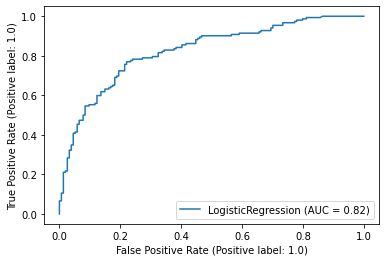

74 wrong out of 306
Accuracy: 0.7581699346405228


In [4]:
# Hyperparameter grid for logistic regression
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty':['none', 'elasticnet', 'l1', 'l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100], 
    'random_state': [rand]
}

# Train
log = LogisticRegression(random_state=0)
grid_log = GridSearchCV(log, param_grid, cv=5)
grid_log.fit(X_train, y_train)

# Results
print(grid_log.best_params_)
evaluate_model(grid_log.best_estimator_, X_full, y_full, X_test, y_test, scores)

## Random Forest Classifier (RandomForestClassifier)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 42}

5 fold cross validation scores:
[0.70588235 0.7254902  0.68137255 0.74509804 0.65686275]

5 fold cross validation score average:
0.7029411764705882

AUROC score:
0.7127477785372522


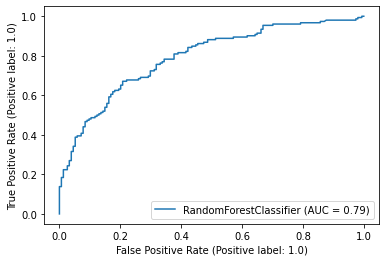

88 wrong out of 306
Accuracy: 0.7124183006535948


In [5]:
# Hyperparameter grid for random forest
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state': [rand]
}

# Train
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, param_grid, cv=5)
grid_rfc.fit(X_train, y_train)

# Results
print(grid_rfc.best_params_)
evaluate_model(grid_rfc.best_estimator_, X_full, y_full, X_test, y_test, scores)

## Multi-layer Perceptron (MLPClassifier)


5 fold cross validation scores:
[0.69607843 0.75980392 0.70588235 0.74509804 0.66666667]

5 fold cross validation score average:
0.7147058823529411

AUROC score:
0.7417122351332878


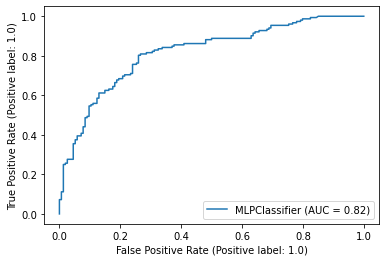

79 wrong out of 306
Accuracy: 0.7418300653594772


In [6]:
# Train 
mlp = MLPClassifier(max_iter=1000, random_state=rand)
mlp.fit(X_train, y_train)

# Results
evaluate_model(mlp, X_full, y_full, X_test, y_test, scores)

 ## SVM with Stochastic Gradient Descent (SGDClassifier)

{'alpha': 0.001, 'loss': 'huber', 'max_iter': 10000, 'penalty': 'elasticnet', 'random_state': 42}

5 fold cross validation scores:
[0.71568627 0.74019608 0.70098039 0.78431373 0.71078431]

5 fold cross validation score average:
0.7303921568627452

AUROC score:
0.7547846889952152


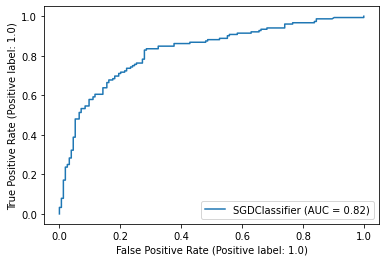

75 wrong out of 306
Accuracy: 0.7549019607843137


In [7]:
# Hyperparameter grid for sgd
param_grid = { 
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha' : [0.0001, 0.001, 0.01],
    'max_iter' :[10000, 15000],
    'random_state': [rand]
}

# Train
sgd = SGDClassifier()
grid_sgd = GridSearchCV(sgd, param_grid, cv=5)
grid_sgd.fit(X_train, y_train)

# Note: A number of parameters lead to a convergence warning due to our choice of max_iter,
#       you can turn off the warnings filts in the first cell to view these warnings. 

# Results
print(grid_sgd.best_params_)
evaluate_model(grid_sgd.best_estimator_, X_full, y_full, X_test, y_test, scores)

## K Nearest Neighbors (KNeighborsClassifier)

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

5 fold cross validation scores:
[0.62254902 0.68627451 0.64705882 0.64705882 0.63235294]

5 fold cross validation score average:
0.6470588235294118

AUROC score:
0.6744702665755298


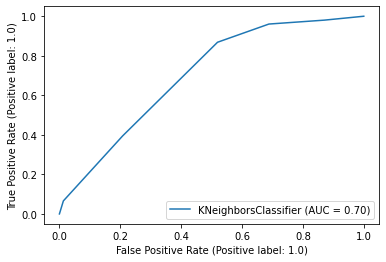

100 wrong out of 306
Accuracy: 0.673202614379085


In [8]:
# Hyperparameter grid for knn
param_grid = { 
    'n_neighbors': [1, 5, 15, 50, 100],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute'],
    'p': [1, 2]
}

# Train
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(X_train, y_train)

# Results
print(grid_knn.best_params_)
evaluate_model(grid_knn.best_estimator_, X_full, y_full, X_test, y_test, scores)

## Decision Tree (DecisionTreeClassifier)

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'random_state': 42, 'splitter': 'random'}

5 fold cross validation scores:
[0.61764706 0.63235294 0.65686275 0.6127451  0.68137255]

5 fold cross validation score average:
0.6401960784313726

AUROC score:
0.6534945317840054


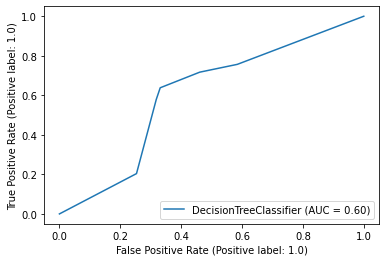

106 wrong out of 306
Accuracy: 0.6535947712418301


In [9]:
# Hyperparameter grid for dtc
param_grid = { 
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 100, 200],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'random_state': [rand]
}

# Train
dtc = DecisionTreeClassifier()
grid_dtc = GridSearchCV(dtc, param_grid, cv=5)
grid_dtc.fit(X_train, y_train)

# Results
print(grid_dtc.best_params_)
evaluate_model(grid_dtc.best_estimator_, X_full, y_full, X_test, y_test, scores)

## Ensemble Stacking Classifier (StackingClassifier)


5 fold cross validation scores:
[0.69607843 0.74019608 0.66666667 0.74019608 0.68627451]

5 fold cross validation score average:
0.7058823529411764

AUROC score:
0.7582450444292549


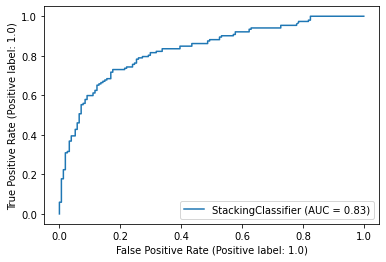

74 wrong out of 306
Accuracy: 0.7581699346405228


In [10]:
# Estimators in stack
estimators = [
    ('svm', grid_svm.best_estimator_), 
    ('log', grid_log.best_estimator_),
    ('rfc', grid_rfc.best_estimator_), 
    ('mlp', mlp), 
    ('sgd', grid_sgd.best_estimator_), 
    ('knn', grid_knn.best_estimator_), 
    ('dtc', grid_dtc.best_estimator_)
]

# Train full stack
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=LogisticRegression(), 
                               passthrough=True)
stack_clf.fit(X_train, y_train)

# Results
evaluate_model(stack_clf, X_full, y_full, X_test, y_test, scores)

## Voting Classifier (VotingClassifier)

In [13]:
# Estimators in stack
estimators = [
    ('svm', grid_svm.best_estimator_), 
    ('log', grid_log.best_estimator_),
    ('rfc', grid_rfc.best_estimator_), 
    ('mlp', mlp), 
    ('sgd', grid_sgd.best_estimator_), 
    ('knn', grid_knn.best_estimator_), 
    ('dtc', grid_dtc.best_estimator_)
]

# Train
vote_clf = VotingClassifier(estimators=estimators, voting='hard')
vote_clf.fit(X_train, y_train)

# Results
evaluate_model(vote_clf, X_full, y_full, X_test, y_test, scores)


5 fold cross validation scores:
[0.7254902  0.75       0.70588235 0.75980392 0.70098039]

5 fold cross validation score average:
0.7284313725490197

AUROC score:
0.7484620642515379
77 wrong out of 306
Accuracy: 0.7483660130718954


# Model Comparison 

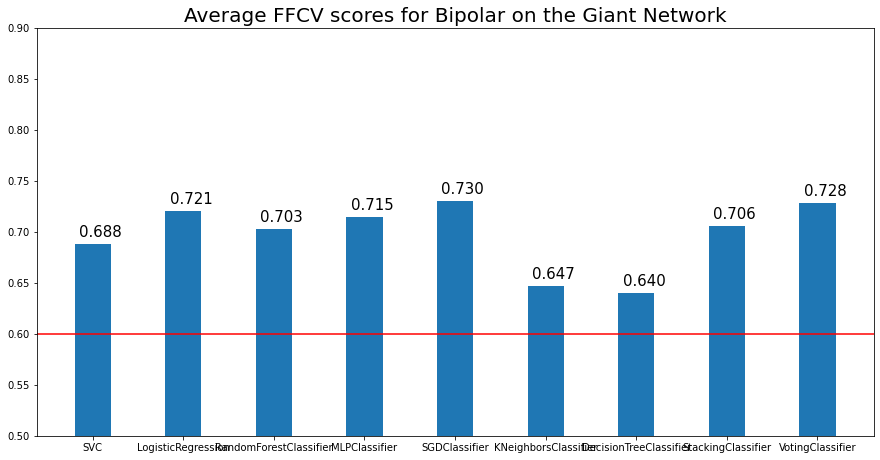

In [14]:
# Simple graph with scores for each model

X_axis = np.arange(len(scores))

fig = plt.figure(figsize = (15, 7.5))
bars2 = plt.bar(X_axis, scores.values(), 0.4)

ax = plt.gca()
ax.set_ylim([0.5,0.9]) 

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.05, yval + .007, format(yval, '.3f'), fontsize=15)

    
plt.axhline(y=0.6, color='r', linestyle='-')
plt.xticks(X_axis, list(scores.keys()))
plt.title("Average FFCV scores for Bipolar on the Giant Network" , fontsize=20)
plt.show()

In [15]:
scores

{'SVC': 0.6882352941176471,
 'LogisticRegression': 0.7205882352941178,
 'RandomForestClassifier': 0.7029411764705882,
 'MLPClassifier': 0.7147058823529411,
 'SGDClassifier': 0.7303921568627452,
 'KNeighborsClassifier': 0.6470588235294118,
 'DecisionTreeClassifier': 0.6401960784313726,
 'StackingClassifier': 0.7058823529411764,
 'VotingClassifier': 0.7284313725490197}

### Save All Models
Note: Running this cell will overwrite existing files in the models folder, proceed with caution

In [16]:
with open("./models/bipolar_scores.pkl", 'wb') as f:
        pickle.dump(scores, f)

# names = list(scores.keys())
# models = [grid_svm.best_estimator_, grid_log.best_estimator_, grid_rfc.best_estimator_, mlp,
#           grid_sgd.best_estimator_, grid_knn.best_estimator_, grid_dtc.best_estimator_]

# for i in range(len(scores)):
#     with open("./models/bipolar/saved_" + names[i] + ".pkl", 'wb') as f:
#         pickle.dump(models[i], f)